In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [123]:
df1 = pd.read_json("data.json")
df2 = pd.read_json("data2.json")

In [124]:
df = pd.concat([df1, df2], ignore_index=True)
df= df.sample(frac=1).reset_index(drop=True)
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,[United States],$39.95,$500+,\n 1\n hourly job\n ...,\n No\n fixed-price jobs...,\n 11\n hours worked\n ...,,\n Experienced Business Intelligence Anal...,Data Science & Analytics
1,[United States],$200.00,$1k+,\n 1\n hourly job\n ...,\n 3\n fixed-price jobs\...,\n 17\n hours worked\n ...,,\n I'm a senior machine learning engineer...,Data Science & Analytics
2,[Albania],$15.00,$2k+,\n 10\n hourly jobs\n ...,\n 12\n fixed-price jobs...,\n 114\n hours worked\n ...,\n 100% \n Job Success\n ...,\n I am architect that have experience i...,Engineering & Architecture
3,[India],$8.00,$30k+,\n 127\n hourly jobs\n ...,\n 64\n fixed-price jobs...,\n 4676\n hours worked\n...,\n 94% \n Job Success\n,\n We measure Facebook promoting results ...,Admin Support
4,[Argentina],$50.00,$3k+,\n 3\n hourly jobs\n ...,\n 7\n fixed-price jobs\...,\n 62\n hours worked\n ...,\n 100% \n Job Success\n ...,\n Hi! Are you looking for an expert in D...,Data Science & Analytics
...,...,...,...,...,...,...,...,...,...
1195,[Australia],$5.00,$1k+,\n 7\n hourly jobs\n ...,\n 9\n fixed-price jobs\...,\n 143\n hours worked\n ...,\n 100% \n Job Success\n ...,\n I have professional experience as a dr...,Engineering & Architecture
1196,[Mexico],$25.00,$1k+,\n 3\n hourly jobs\n ...,\n 8\n fixed-price jobs\...,\n 22\n hours worked\n ...,,\n Highly Skilled Interior Design Archite...,Engineering & Architecture
1197,[Armenia],$25.00,$30k+,\n 7\n hourly jobs\n ...,\n 44\n fixed-price jobs...,\n 106\n hours worked\n ...,\n 96% \n Job Success\n,\n Have professional experience in the fi...,Engineering & Architecture
1198,[India],$40.00,,,,,\n 100% \n Job Success\n ...,\n I am an experienced professional E-lea...,Accounting & Consulting


In [125]:
df.head()

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,[United States],$39.95,$500+,\n 1\n hourly job\n ...,\n No\n fixed-price jobs...,\n 11\n hours worked\n ...,,\n Experienced Business Intelligence Anal...,Data Science & Analytics
1,[United States],$200.00,$1k+,\n 1\n hourly job\n ...,\n 3\n fixed-price jobs\...,\n 17\n hours worked\n ...,,\n I'm a senior machine learning engineer...,Data Science & Analytics
2,[Albania],$15.00,$2k+,\n 10\n hourly jobs\n ...,\n 12\n fixed-price jobs...,\n 114\n hours worked\n ...,\n 100% \n Job Success\n ...,\n I am architect that have experience i...,Engineering & Architecture
3,[India],$8.00,$30k+,\n 127\n hourly jobs\n ...,\n 64\n fixed-price jobs...,\n 4676\n hours worked\n...,\n 94% \n Job Success\n,\n We measure Facebook promoting results ...,Admin Support
4,[Argentina],$50.00,$3k+,\n 3\n hourly jobs\n ...,\n 7\n fixed-price jobs\...,\n 62\n hours worked\n ...,\n 100% \n Job Success\n ...,\n Hi! Are you looking for an expert in D...,Data Science & Analytics


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           1200 non-null   object
 1   hourly_price      1200 non-null   object
 2   total_earning     1200 non-null   object
 3   hourly_jobs       1200 non-null   object
 4   fixed_price_jobs  1200 non-null   object
 5   hours_worked      1200 non-null   object
 6   job_success       1200 non-null   object
 7   description       1200 non-null   object
 8   category          1200 non-null   object
dtypes: object(9)
memory usage: 84.5+ KB


## **Cleaning Data**
 - Tasks to do :
    - Fix Data types problems (e.g deleting `$` from `hourly_price` & `total_earning` columns and then converting it to numerical values, percentage in `job_success` column ...)
    - Take care of missing values  ( missing values were not showing previously in the df.info() output because python interpret an empty string as non-null )

##### fix     `country_column`  :

In [127]:
df["country"]= df["country"].str[0]
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,United States,$39.95,$500+,\n 1\n hourly job\n ...,\n No\n fixed-price jobs...,\n 11\n hours worked\n ...,,\n Experienced Business Intelligence Anal...,Data Science & Analytics
1,United States,$200.00,$1k+,\n 1\n hourly job\n ...,\n 3\n fixed-price jobs\...,\n 17\n hours worked\n ...,,\n I'm a senior machine learning engineer...,Data Science & Analytics
2,Albania,$15.00,$2k+,\n 10\n hourly jobs\n ...,\n 12\n fixed-price jobs...,\n 114\n hours worked\n ...,\n 100% \n Job Success\n ...,\n I am architect that have experience i...,Engineering & Architecture
3,India,$8.00,$30k+,\n 127\n hourly jobs\n ...,\n 64\n fixed-price jobs...,\n 4676\n hours worked\n...,\n 94% \n Job Success\n,\n We measure Facebook promoting results ...,Admin Support
4,Argentina,$50.00,$3k+,\n 3\n hourly jobs\n ...,\n 7\n fixed-price jobs\...,\n 62\n hours worked\n ...,\n 100% \n Job Success\n ...,\n Hi! Are you looking for an expert in D...,Data Science & Analytics
...,...,...,...,...,...,...,...,...,...
1195,Australia,$5.00,$1k+,\n 7\n hourly jobs\n ...,\n 9\n fixed-price jobs\...,\n 143\n hours worked\n ...,\n 100% \n Job Success\n ...,\n I have professional experience as a dr...,Engineering & Architecture
1196,Mexico,$25.00,$1k+,\n 3\n hourly jobs\n ...,\n 8\n fixed-price jobs\...,\n 22\n hours worked\n ...,,\n Highly Skilled Interior Design Archite...,Engineering & Architecture
1197,Armenia,$25.00,$30k+,\n 7\n hourly jobs\n ...,\n 44\n fixed-price jobs...,\n 106\n hours worked\n ...,\n 96% \n Job Success\n,\n Have professional experience in the fi...,Engineering & Architecture
1198,India,$40.00,,,,,\n 100% \n Job Success\n ...,\n I am an experienced professional E-lea...,Accounting & Consulting


##### fix     `hourly_price`  :

In [128]:
df["hourly_price"]=df["hourly_price"].str.strip("$").astype(np.float32)
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,United States,39.950001,$500+,\n 1\n hourly job\n ...,\n No\n fixed-price jobs...,\n 11\n hours worked\n ...,,\n Experienced Business Intelligence Anal...,Data Science & Analytics
1,United States,200.000000,$1k+,\n 1\n hourly job\n ...,\n 3\n fixed-price jobs\...,\n 17\n hours worked\n ...,,\n I'm a senior machine learning engineer...,Data Science & Analytics
2,Albania,15.000000,$2k+,\n 10\n hourly jobs\n ...,\n 12\n fixed-price jobs...,\n 114\n hours worked\n ...,\n 100% \n Job Success\n ...,\n I am architect that have experience i...,Engineering & Architecture
3,India,8.000000,$30k+,\n 127\n hourly jobs\n ...,\n 64\n fixed-price jobs...,\n 4676\n hours worked\n...,\n 94% \n Job Success\n,\n We measure Facebook promoting results ...,Admin Support
4,Argentina,50.000000,$3k+,\n 3\n hourly jobs\n ...,\n 7\n fixed-price jobs\...,\n 62\n hours worked\n ...,\n 100% \n Job Success\n ...,\n Hi! Are you looking for an expert in D...,Data Science & Analytics
...,...,...,...,...,...,...,...,...,...
1195,Australia,5.000000,$1k+,\n 7\n hourly jobs\n ...,\n 9\n fixed-price jobs\...,\n 143\n hours worked\n ...,\n 100% \n Job Success\n ...,\n I have professional experience as a dr...,Engineering & Architecture
1196,Mexico,25.000000,$1k+,\n 3\n hourly jobs\n ...,\n 8\n fixed-price jobs\...,\n 22\n hours worked\n ...,,\n Highly Skilled Interior Design Archite...,Engineering & Architecture
1197,Armenia,25.000000,$30k+,\n 7\n hourly jobs\n ...,\n 44\n fixed-price jobs...,\n 106\n hours worked\n ...,\n 96% \n Job Success\n,\n Have professional experience in the fi...,Engineering & Architecture
1198,India,40.000000,,,,,\n 100% \n Job Success\n ...,\n I am an experienced professional E-lea...,Accounting & Consulting


##### fix     `total_earning`  :

In [129]:
df["total_earning"] = df["total_earning"].apply(lambda x : None if x=="" else (int(x.strip("$k+"))*1000 if "k" in x else (int(x.strip("$+M")*1000000 if "M" in x else int(x.strip("$+") )))))

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           1200 non-null   object 
 1   hourly_price      1200 non-null   float32
 2   total_earning     1042 non-null   float64
 3   hourly_jobs       1200 non-null   object 
 4   fixed_price_jobs  1200 non-null   object 
 5   hours_worked      1200 non-null   object 
 6   job_success       1200 non-null   object 
 7   description       1200 non-null   object 
 8   category          1200 non-null   object 
dtypes: float32(1), float64(1), object(7)
memory usage: 79.8+ KB


##### fix     `hourly_jobs` , `fixed_price_jobs` , `hours_worked`, `job_success`  :

In [131]:
# hourly_jobs column :
df["hourly_jobs"] = df["hourly_jobs"].apply(lambda x : None if x=="" else( int(re.findall('[0-9]+', x)[0]) if len(re.findall('[0-9]+', x)) >0 else 0))

# fixed_price_jobs column :
df["fixed_price_jobs"] = df["fixed_price_jobs"].apply(lambda x : None if x=="" else( int(re.findall('[0-9]+', x)[0]) if len(re.findall('[0-9]+', x)) >0 else 0))

# hours_worked column :
df["hours_worked"] = df["hours_worked"].apply(lambda x : None if x=="" else( int(re.findall('[0-9]+', x)[0]) if len(re.findall('[0-9]+', x)) >0 else 0))

# job_success column :
df["job_success"] = df["job_success"].apply(lambda x : None if x=="" else( float(re.findall('[0-9]+', x)[0])/100 if len(re.findall('[0-9]+', x)) >0 else 0))

In [132]:
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,United States,39.950001,500.0,1.0,0.0,11.0,NaN,\n Experienced Business Intelligence Anal...,Data Science & Analytics
1,United States,200.000000,1000.0,1.0,3.0,17.0,NaN,\n I'm a senior machine learning engineer...,Data Science & Analytics
2,Albania,15.000000,2000.0,10.0,12.0,114.0,1.00,\n I am architect that have experience i...,Engineering & Architecture
3,India,8.000000,30000.0,127.0,64.0,4676.0,0.94,\n We measure Facebook promoting results ...,Admin Support
4,Argentina,50.000000,3000.0,3.0,7.0,62.0,1.00,\n Hi! Are you looking for an expert in D...,Data Science & Analytics
...,...,...,...,...,...,...,...,...,...
1195,Australia,5.000000,1000.0,7.0,9.0,143.0,1.00,\n I have professional experience as a dr...,Engineering & Architecture
1196,Mexico,25.000000,1000.0,3.0,8.0,22.0,NaN,\n Highly Skilled Interior Design Archite...,Engineering & Architecture
1197,Armenia,25.000000,30000.0,7.0,44.0,106.0,0.96,\n Have professional experience in the fi...,Engineering & Architecture
1198,India,40.000000,NaN,NaN,NaN,NaN,1.00,\n I am an experienced professional E-lea...,Accounting & Consulting


##### Dealing with `description` column : 
- For now, we are just going to replace the description with its length, and we will study its correlation with the target (category) later (maybe freelancers in STEM fields tend to write longest description because of the various tools they use - softwares, programming languages, projects ...- that's what we will try to answer later)


In [133]:
df["description"] = df["description"].apply(lambda x : len(x))
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,United States,39.950001,500.0,1.0,0.0,11.0,NaN,302,Data Science & Analytics
1,United States,200.000000,1000.0,1.0,3.0,17.0,NaN,436,Data Science & Analytics
2,Albania,15.000000,2000.0,10.0,12.0,114.0,1.00,430,Engineering & Architecture
3,India,8.000000,30000.0,127.0,64.0,4676.0,0.94,351,Admin Support
4,Argentina,50.000000,3000.0,3.0,7.0,62.0,1.00,1759,Data Science & Analytics
...,...,...,...,...,...,...,...,...,...
1195,Australia,5.000000,1000.0,7.0,9.0,143.0,1.00,309,Engineering & Architecture
1196,Mexico,25.000000,1000.0,3.0,8.0,22.0,NaN,256,Engineering & Architecture
1197,Armenia,25.000000,30000.0,7.0,44.0,106.0,0.96,380,Engineering & Architecture
1198,India,40.000000,NaN,NaN,NaN,NaN,1.00,2469,Accounting & Consulting


## Missing values problems: 
- we dealt with data types problems. Let's address now missing values problem

In [134]:
# Proportion of missing values per column :
a = df.isna().sum()/len(df)
print((a*100).round(2))

country              0.00
hourly_price         0.00
total_earning       13.17
hourly_jobs         13.17
fixed_price_jobs    13.17
hours_worked        13.17
job_success         35.00
description          0.00
category             0.00
dtype: float64


#####             about 35% of `job_success` data is missing, that means the `job_succes` attribute does not provide us with any real or valuable information in our analysis. Thus, It would be better if we dropped it

In [135]:
# drop job_success : 
df.drop(columns=["job_success"], inplace= True)

In [136]:
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,description,category
0,United States,39.950001,500.0,1.0,0.0,11.0,302,Data Science & Analytics
1,United States,200.000000,1000.0,1.0,3.0,17.0,436,Data Science & Analytics
2,Albania,15.000000,2000.0,10.0,12.0,114.0,430,Engineering & Architecture
3,India,8.000000,30000.0,127.0,64.0,4676.0,351,Admin Support
4,Argentina,50.000000,3000.0,3.0,7.0,62.0,1759,Data Science & Analytics
...,...,...,...,...,...,...,...,...
1195,Australia,5.000000,1000.0,7.0,9.0,143.0,309,Engineering & Architecture
1196,Mexico,25.000000,1000.0,3.0,8.0,22.0,256,Engineering & Architecture
1197,Armenia,25.000000,30000.0,7.0,44.0,106.0,380,Engineering & Architecture
1198,India,40.000000,NaN,NaN,NaN,NaN,2469,Accounting & Consulting


### Dropping samples with missing values 

In [165]:
df.dropna(axis=0, inplace = True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 0 to 1197
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           1042 non-null   object 
 1   hourly_price      1042 non-null   float32
 2   total_earning     1042 non-null   float64
 3   hourly_jobs       1042 non-null   float64
 4   fixed_price_jobs  1042 non-null   float64
 5   hours_worked      1042 non-null   float64
 6   description       1042 non-null   int64  
 7   category          1042 non-null   object 
dtypes: float32(1), float64(4), int64(1), object(2)
memory usage: 69.2+ KB


### Exploratory Data Analysis :

 Number of freelancers per Country :

In [196]:
cnt = df["country"].value_counts()
cnt = cnt[cnt > 10]
cnt


Philippines       241
United States     140
Ukraine           113
Pakistan           48
Egypt              46
India              43
Argentina          35
Venezuela          28
United Kingdom     27
Bangladesh         20
Serbia             19
Brazil             17
Indonesia          16
China              13
Canada             11
Name: country, dtype: int64

<AxesSubplot:>

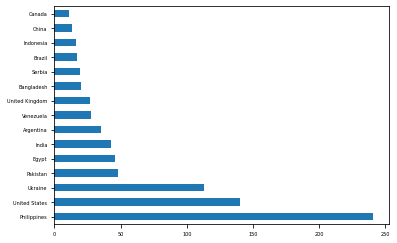

In [197]:

cnt.plot(kind="barh", fontsize = 5)